# Milestone 2

## Perkenalan

```
==========================================================================
Milestone 2

Nama = Irfansyah Alif Muhammad
Batch = HCK-007

Tujuan proyek ini adalah membuat model prediksi menggunakan data historis, 
yang dapat memproyeksikan potensi lulus atau tidaknya seorang mahasiswa.
==========================================================================

```

## Link Hugging Face

https://huggingface.co/spaces/Irfnn/Milestone_2

### Latar Belakang

Saya adalah seorang Data Scientist yang saat ini tengah melakukan analisis terhadap Universitas Abadi Jaya Makmur dengan tujuan untuk menentukan apakah seorang mahasiswa lulus atau tidak berdasarkan sejumlah faktor pendukung yang telah diperoleh.

### Problem Statement

Menurunkan kesalahan model sistem yang digunakan Universitas karena sering salah memberikan hasil seperti mahasiswa yang aslinya tidak lulus tapi di predict oleh sistem lulus.

### Conceptual Problems

1. Jelaskan latar belakang adanya bagging dan cara kerja bagging !
 
**Latar Belakang Bagging (Bootstrap Aggregating)**:<br>
Bagging adalah teknik ensemble learning untuk meningkatkan kinerja model machine learning yang diperkenalkan oleh Leo Breiman pada tahun 1996, yang bertujuan untuk mengatasi overfitting dan variabilitas hasil prediksi.

**Cara Kerja Bagging**:
   - Bagging menggunakan teknik bootstrap resampling untuk membuat dataset subsample.
   - Model yang sama dilatih secara independen pada setiap subsample.
   - Prediksi akhir diperoleh dengan menggabungkan hasil prediksi dari semua model.

**Manfaat Bagging**:
   - Mengurangi variabilitas dan membuat hasil prediksi lebih stabil.
   - Meningkatkan akurasi prediksi dibandingkan dengan satu model tunggal.
   - Bisa digunakan dengan berbagai jenis model machine learning.

Contohnya yaitu Random Forest, yang menggabungkan banyak Decision Trees untuk meningkatkan prediksi dan mengurangi overfitting.

2. Jelaskan perbedaan cara kerja algoritma Random Forest dengan algoritma boosting yang Anda pilih! <br>
Saya menggunakan Model SVM
- **Random Forest** adalah ensemble learning dengan banyak Decision Trees yang bekerja sendiri-sendiri dan menggabungkan hasil prediksi. Ini mengurangi variabilitas hasil, resisten terhadap overfitting, dan lebih mudah diinterpretasikan.
  
- **SVM** (Support Vector Machine) adalah model tunggal yang mencari hyperplane terbaik untuk memisahkan data. Dapat menangani masalah linier dan non-linier, tetapi memerlukan penanganan khusus untuk data tidak seimbang. Lebih sulit diinterpretasikan dan pelatihan bisa lebih lambat. Pilihan tergantung pada kompleksitas data dan prioritas interpretabilitas vs kinerja.

3. Jelaskan apa yang dimaksud dengan Cross Validation ! <br>
Cross Validation adalah teknik penting dalam machine learning untuk mengukur dan menguji kinerja model. Ini melibatkan pembagian dataset menjadi beberapa bagian, melatih model pada beberapa bagian tersebut, dan menguji pada bagian lainnya. Hal ini dapat membantu memastikan bahwa model dapat bekerja dengan baik pada data yang belum pernah dilihat sebelumnya, mencegah overfitting, dan memberikan estimasi yang lebih akurat tentang seberapa baik model tersebut.

## Import Libraries

In [215]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import pickle
from phik import phik_matrix

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from feature_engine.outliers import Winsorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

# Model 
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, f1_score, accuracy_score, precision_score, recall_score
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Untuk mengabaikan fitur peringatan
import warnings
warnings.filterwarnings('ignore')

## Kamus Data

Berikut adalah daftar variabel dalam dataset:

- **Status perkawinan**: Status perkawinan mahasiswa. (Kategorik) 
  - 1: lajang
  - 2: menikah
  - 3: duda
  - 4: bercerai
  - 5: persatuan de facto
  - 6: terpisah secara legal 
  
  <br>

- **Mode aplikasi**: Metode aplikasi yang digunakan oleh mahasiswa. (Kategorik)

- **Urutan aplikasi**: Urutan di mana mahasiswa mengajukan aplikasi. (Numerik)

- **Jurusan**: Jurusan yang diambil oleh mahasiswa. (Kategorik)

- **Kehadiran siang/malam**: Apakah mahasiswa menghadiri kelas siang atau malam hari. (Kategorik)

- **Kualifikasi sebelumnya**: Kualifikasi yang diperoleh oleh mahasiswa sebelum mendaftar di perguruan tinggi.
  - 1 - Pendidikan Sekunder
  - 2 - Pendidikan Tinggi - Sarjana (Bachelor)
  - 3 - Pendidikan Tinggi - Diploma
  - 4 - Pendidikan Tinggi - Magister (Master)
  - 5 - Pendidikan Tinggi - Doktor (Doctorate)
  - 6 - Frekuensi Pendidikan Tinggi
  - 9 - Tahun ke-12 Pendidikan - Tidak Selesai
  - 10 - Tahun ke-11 Pendidikan - Tidak Selesai
  - 12 - Lainnya - Tahun ke-11 Pendidikan
  - 14 - Tahun ke-10 Pendidikan
  - 15 - Tahun ke-10 Pendidikan - Tidak Selesai
  - 19 - Pendidikan Dasar - Siklus 3 (Tahun ke-9/10/11) atau sejenisnya
  - 38 - Pendidikan Dasar - Siklus 2 (Tahun ke-6/7/8) atau sejenisnya
  - 39 - Kursus Spesialisasi Teknologi
  - 40 - Pendidikan Tinggi - Diploma (Siklus 1)
  - 42 - Kursus Teknik Tinggi Profesional
  - 43 - Pendidikan Tinggi - Magister (Siklus 2) (Kategorik)
 
<br>

- **Kebangsaan**: Kebangsaan mahasiswa. (Kategorik)
  - 1 - Portugis
  - 2 - Jerman
  - 6 - Spanyol
  - 11 - Italia
  - 13 - Belanda
  - 14 - Inggris
  - 17 - Lituania
  - 21 - Angola
  - 22 - Tanjung Verde
  - 24 - Guinea
  - 25 - Mozambik
  - 26 - Sao Tome
  - 32 - Turki
  - 41 - Brasil
  - 62 - Rumania
  - 100 - Moldova (Republik)
  - 101 - Meksiko
  - 103 - Ukraina
  - 105 - Rusia
  - 108 - Kuba
  - 109 - Kolombia

<br>

- **Kualifikasi ibu**: Kualifikasi ibu dari mahasiswa. (Kategorik)
    - 1 - Pendidikan Sekunder - Tahun ke-12 atau setara
    - 2 - Pendidikan Tinggi - Gelar Sarjana
    - 3 - Pendidikan Tinggi - Gelar
    - 4 - Pendidikan Tinggi - Gelar Magister
    - 5 - Pendidikan Tinggi - Gelar Doktor
    - 6 - Frekuensi Pendidikan Tinggi
    - 9 - Tahun ke-12 Pendidikan - Tidak Selesai
    - 10 - Tahun ke-11 Pendidikan - Tidak Selesai
    - 11 - Tahun ke-7 (Lama)
    - 12 - Lainnya - Tahun ke-11 Pendidikan
    - 14 - Tahun ke-10 Pendidikan
    - 18 - Kursus Umum Perdagangan
    - 19 - Pendidikan Dasar - Siklus 3 (Tahun ke-9/10/11) atau sejenisnya
    - 22 - Kursus Teknis Profesional
    - 26 - Tahun ke-7 Pendidikan
    - 27 - Siklus 2 Kursus Sekolah Menengah Umum
    - 29 - Tahun ke-9 Pendidikan - Tidak Selesai
    - 30 - Tahun ke-8 Pendidikan
    - 34 - Tidak Diketahui
    - 35 - Tidak Bisa Membaca atau Menulis
    - 36 - Bisa Membaca tanpa Menyelesaikan Tahun ke-4 Pendidikan
    - 37 - Pendidikan Dasar - Siklus 1 (Tahun ke-4/5) atau sejenisnya
    - 38 - Pendidikan Dasar - Siklus 2 (Tahun ke-6/7/8) atau sejenisnya
    - 39 - Kursus Spesialisasi Teknologi
    - 40 - Pendidikan Tinggi - Gelar (Siklus 1)
    - 41 - Kursus Studi Tinggi Khusus
    - 42 - Kursus Teknik Tinggi Profesional
    - 43 - Pendidikan Tinggi - Gelar Magister (Siklus 2)
    - 44 - Pendidikan Tinggi - Gelar Doktor (Siklus 3) 

<br>

- **Kualifikasi ayah**: Kualifikasi ayah dari mahasiswa. (Kategorik)
    - 1 - Pendidikan Sekunder - Tahun ke-12 atau setara
    - 2 - Pendidikan Tinggi - Gelar Sarjana
    - 3 - Pendidikan Tinggi - Gelar
    - 4 - Pendidikan Tinggi - Gelar Magister
    - 5 - Pendidikan Tinggi - Gelar Doktor
    - 6 - Frekuensi Pendidikan Tinggi
    - 9 - Tahun ke-12 Pendidikan - Tidak Selesai
    - 10 - Tahun ke-11 Pendidikan - Tidak Selesai
    - 11 - Tahun ke-7 (Lama)
    - 12 - Lainnya - Tahun ke-11 Pendidikan
    - 14 - Tahun ke-10 Pendidikan
    - 18 - Kursus Umum Perdagangan
    - 19 - Pendidikan Dasar - Siklus 3 (Tahun ke-9/10/11) atau sejenisnya
    - 22 - Kursus Teknis Profesional
    - 26 - Tahun ke-7 Pendidikan
    - 27 - Siklus 2 Kursus Sekolah Menengah Umum
    - 29 - Tahun ke-9 Pendidikan - Tidak Selesai
    - 30 - Tahun ke-8 Pendidikan
    - 34 - Tidak Diketahui
    - 35 - Tidak Bisa Membaca atau Menulis
    - 36 - Bisa Membaca tanpa Menyelesaikan Tahun ke-4 Pendidikan
    - 37 - Pendidikan Dasar - Siklus 1 (Tahun ke-4/5) atau sejenisnya
    - 38 - Pendidikan Dasar - Siklus 2 (Tahun ke-6/7/8) atau sejenisnya
    - 39 - Kursus Spesialisasi Teknologi
    - 40 - Pendidikan Tinggi - Gelar (Siklus 1)
    - 41 - Kursus Studi Tinggi Khusus
    - 42 - Kursus Teknik Tinggi Profesional
    - 43 - Pendidikan Tinggi - Gelar Magister (Siklus 2)
    - 44 - Pendidikan Tinggi - Gelar Doktor (Siklus 3)

<br>

- **Pekerjaan ibu**: Pekerjaan ibu dari mahasiswa. (Kategorik)
   - 0 - Mahasiswa
   - 1 - Perwakilan Kekuasaan Legislatif dan Badan Eksekutif, Direktur, Manajer Direktur, dan Eksekutif
   - 2 - Spesialis dalam Aktivitas Intelektual dan Ilmiah
   - 3 - Teknisi Tingkat Menengah dan Profesi
   - 4 - Staf Administrasi
   - 5 - Pekerja Layanan Pribadi, Keamanan, dan Keselamatan serta Penjual
   - 6 - Petani dan Tenaga Kerja Terampil di Bidang Pertanian, Perikanan, dan Kehutanan
   - 7 - Tenaga Kerja Terampil di Industri, Konstruksi, dan Pengrajin
   - 8 - Operator Pemasangan dan Mesin serta Tenaga Kerja Perakitan
   - 9 - Tenaga Kerja Tidak Terampil
   - 10 - Profesi Angkatan Bersenjata
   - 90 - Situasi Lainnya
   - 99 - (kosong)
   - 122 - Profesional Kesehatan
   - 123 - Guru
   - 125 - Spesialis Teknologi Informasi dan Komunikasi (TIK)
   - 131 - Teknisi dan Profesi Tingkat Menengah Ilmu Pengetahuan dan Teknik
   - 132 - Teknisi dan Profesional, Tingkat Menengah Kesehatan
   - 134 - Teknisi Tingkat Menengah dari Layanan Hukum, Sosial, Olahraga, Budaya, dan Sejenisnya
   - 141 - Tenaga Kerja Kantor, Sekretaris Umum, dan Operator Pengolahan Data
   - 143 - Operator Data, Akuntansi, Statistik, Layanan Keuangan, dan Terkait Pencatatan
   - 144 - Staf Dukungan Administrasi Lainnya
   - 151 - Pekerja Layanan Pribadi
   - 152 - Penjual
   - 153 - Pekerja Perawatan Pribadi dan Sejenisnya
   - 154 - Personel Layanan Proteksi dan Keamanan
   - 161 - Petani yang Berorientasi pada Pasar dan Tenaga Kerja Terampil di Bidang Pertanian dan Produksi Hewan
   - 163 - Petani, Pemelihara Ternak, Nelayan, Pemburu, dan Pengumpul, Subsisten
   - 171 - Tenaga Kerja Konstruksi Terampil dan Sejenisnya, kecuali Elektrik
   - 172 - Tenaga Kerja Terampil di Bidang Metalurgi, Pengerjaan Logam, dan Sejenisnya
   - 174 - Tenaga Kerja Terampil di Bidang Listrik dan Elektronik
   - 175 - Tenaga Kerja di Bidang Pengolahan Makanan, Kayu, Pakaian, dan Industri serta Kerajinan Lainnya
   - 191 - Pekerja Pembersihan
   - 192 - Tenaga Kerja Tidak Terampil di Bidang Pertanian, Produksi Hewan, Perikanan, dan Kehutanan
   - 193 - Tenaga Kerja Tidak Terampil di Industri Ekstraktif, Konstruksi, Manufaktur, dan Transportasi
   - 194 - Asisten Persiapan Makanan

<br>

- **Pekerjaan ayah**: Pekerjaan ayah dari mahasiswa. (Kategorik)
   - 0 - Mahasiswa
   - 1 - Perwakilan Kekuasaan Legislatif dan Badan Eksekutif, Direktur, Manajer Direktur, dan Eksekutif
   - 2 - Spesialis dalam Aktivitas Intelektual dan Ilmiah
   - 3 - Teknisi Tingkat Menengah dan Profesi
   - 4 - Staf Administrasi
   - 5 - Pekerja Layanan Pribadi, Keamanan, dan Keselamatan serta Penjual
   - 6 - Petani dan Tenaga Kerja Terampil di Bidang Pertanian, Perikanan, dan Kehutanan
   - 7 - Tenaga Kerja Terampil di Industri, Konstruksi, dan Pengrajin
   - 8 - Operator Pemasangan dan Mesin serta Tenaga Kerja Perakitan
   - 9 - Tenaga Kerja Tidak Terampil
   - 10 - Profesi Angkatan Bersenjata
   - 90 - Situasi Lainnya
   - 99 - (kosong)
   - 122 - Profesional Kesehatan
   - 123 - Guru
   - 125 - Spesialis Teknologi Informasi dan Komunikasi (TIK)
   - 131 - Teknisi dan Profesi Tingkat Menengah Ilmu Pengetahuan dan Teknik
   - 132 - Teknisi dan Profesional, Tingkat Menengah Kesehatan
   - 134 - Teknisi Tingkat Menengah dari Layanan Hukum, Sosial, Olahraga, Budaya, dan Sejenisnya
   - 141 - Tenaga Kerja Kantor, Sekretaris Umum, dan Operator Pengolahan Data
   - 143 - Operator Data, Akuntansi, Statistik, Layanan Keuangan, dan Terkait Pencatatan
   - 144 - Staf Dukungan Administrasi Lainnya
   - 151 - Pekerja Layanan Pribadi
   - 152 - Penjual
   - 153 - Pekerja Perawatan Pribadi dan Sejenisnya
   - 154 - Personel Layanan Proteksi dan Keamanan
   - 161 - Petani yang Berorientasi pada Pasar dan Tenaga Kerja Terampil di Bidang Pertanian dan Produksi Hewan
   - 163 - Petani, Pemelihara Ternak, Nelayan, Pemburu, dan Pengumpul, Subsisten
   - 171 - Tenaga Kerja Konstruksi Terampil dan Sejenisnya, kecuali Elektrik
   - 172 - Tenaga Kerja Terampil di Bidang Metalurgi, Pengerjaan Logam, dan Sejenisnya
   - 174 - Tenaga Kerja Terampil di Bidang Listrik dan Elektronik
   - 175 - Tenaga Kerja di Bidang Pengolahan Makanan, Kayu, Pakaian, dan Industri serta Kerajinan Lainnya
   - 191 - Pekerja Pembersihan
   - 192 - Tenaga Kerja Tidak Terampil di Bidang Pertanian, Produksi Hewan, Perikanan, dan Kehutanan
   - 193 - Tenaga Kerja Tidak Terampil di Industri Ekstraktif, Konstruksi, Manufaktur, dan Transportasi
   - 194 - Asisten Persiapan Makanan

<br>

- **Terdislokasi**: Apakah mahasiswa adalah orang terdislokasi. (Kategorik)

- **Kebutuhan pendidikan khusus**: Apakah mahasiswa memiliki kebutuhan pendidikan khusus. (Kategorik)

- **Pemberi pinjaman**: Apakah mahasiswa adalah pemberi pinjaman. (Kategorik)

- **Biaya kuliah terkini**: Apakah biaya kuliah mahasiswa sudah terbayar. (Kategorik)

- **Jenis kelamin**: Jenis kelamin mahasiswa. (Kategorik)

- **Pemegang beasiswa**: Apakah mahasiswa adalah pemegang beasiswa. (Kategorik)

- **Usia saat mendaftar**: Usia mahasiswa saat mendaftar. (Numerik)

- **Internasional**: Apakah mahasiswa adalah mahasiswa internasional. (Kategorik)

- **Unit kurikuler semester pertama (diakui)**: Jumlah unit kurikuler yang diakui oleh mahasiswa pada semester pertama. (Numerik)

- **Unit kurikuler semester pertama (terdaftar)**: Jumlah unit kurikuler yang terdaftar oleh mahasiswa pada semester pertama. (Numerik)

- **Unit kurikuler semester pertama (evaluasi)**: Jumlah unit kurikuler yang dievaluasi oleh mahasiswa pada semester pertama. (Numerik)

- **Unit kurikuler semester pertama (disetujui)**: Jumlah unit kurikuler yang disetujui oleh mahasiswa pada semester pertama. (Numerik)

- **Tingkat pengangguran**: Tingkat pengangguran (%)

- **Tingkat inflasi**: Tingkat inflasi (%)

- **GDP**: GDP

- **Target**: Klasifikasi dari tiga kategori (drop out, terdaftar, dan lulus).

## Data Loading

In [216]:
df = pd.read_csv('dataset.csv')
df

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,15,1,1,1,1,1,6,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,15,1,1,19,1,1,10,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,12,1,1,1,22,27,10,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9,1,1,1,22,27,8,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


## Exploratory Data Analysis (EDA)

In [217]:
# Melihat tipe data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nacionality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother's occupation                      

In [218]:
# Melihat column beserta isinya
df.nunique()

Marital status                                      6
Application mode                                   18
Application order                                   8
Course                                             17
Daytime/evening attendance                          2
Previous qualification                             17
Nacionality                                        21
Mother's qualification                             29
Father's qualification                             34
Mother's occupation                                32
Father's occupation                                46
Displaced                                           2
Educational special needs                           2
Debtor                                              2
Tuition fees up to date                             2
Gender                                              2
Scholarship holder                                  2
Age at enrollment                                  46
International               

In [219]:
# Melihat column yang memiliki Missing Value
df.isnull().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrollment                                 0
International                                     0
Curricular u

In [220]:
# Melihat yang data yang Duplicated
df.duplicated().sum()

0

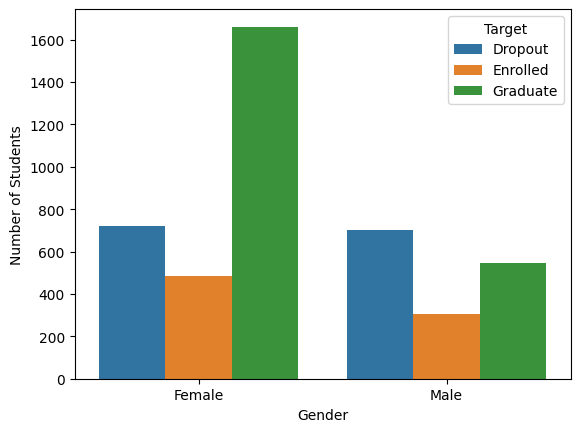

In [221]:
# Melihat Barchart Gender
sns.countplot(data=df, x='Gender', hue='Target', hue_order=['Dropout', 'Enrolled', 'Graduate'])
plt.xticks(ticks=[0,1], labels=['Female','Male'])
plt.ylabel('Number of Students')
plt.show()

Berdasarkan data yang ada, perempuan memiliki jumlah lulusan tertinggi, namun juga memiliki jumlah siswa yang paling tinggi yang keluar dari sekolah dibandingkan dengan laki-laki. Dengan kata lain, meskipun lebih banyak perempuan yang berhasil menyelesaikan pendidikan mereka, tetapi juga terdapat lebih banyak perempuan yang tidak melanjutkan pendidikan mereka dibandingkan dengan laki-laki.

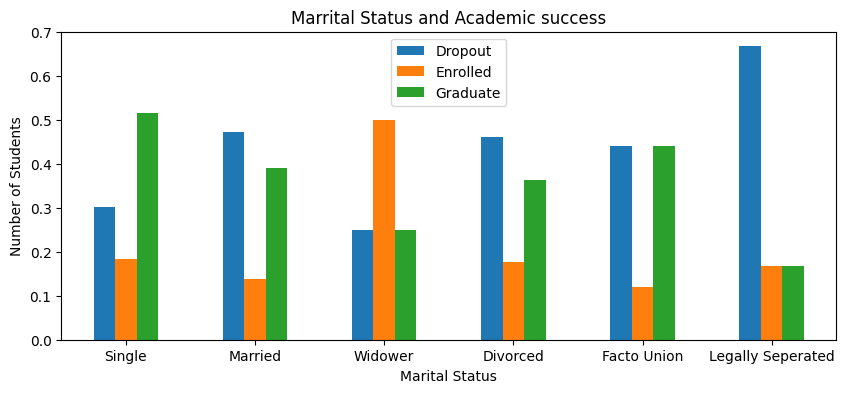

In [222]:
# Melihat Kelulusan dari Status Nikah
pd.crosstab(df["Marital status"], df["Target"], normalize='index').plot(kind="bar", figsize=(10,4), title="Marrital Status and Academic success" )
plt.xticks(ticks=[0, 1, 2, 3, 4, 5], labels=['Single', 'Married', 'Widower', 'Divorced', 'Facto Union', 'Legally Seperated'])

plt.xlabel('Marital Status')
plt.ylabel('Number of Students')
plt.xticks(rotation=0)
plt.legend(loc=9)
plt.show()

Dari grafik batang di atas, dapat diambil beberapa kesimpulan penting sebagai berikut:

-    Mahasiswa yang berstatus hukum terpisah (legally separated) memiliki tingkat keluar dari sekolah yang signifikan lebih tinggi dibandingkan dengan mahasiswa dalam status perkawinan lainnya. Hal ini menunjukkan bahwa situasi perkawinan yang terpisah secara hukum dapat menjadi faktor risiko yang signifikan dalam kelulusan.

-    Mahasiswa yang lajang (single) cenderung memiliki tingkat kelulusan yang lebih tinggi dibandingkan dengan yang berstatus perkawinan lainnya. Ini mungkin disebabkan oleh fokus yang lebih besar pada pendidikan mereka tanpa tanggungan keluarga yang sama seperti mahasiswa yang sudah menikah atau bercerai.

-    Mahasiswa yang menikah (married) dan yang telah bercerai (divorced) memiliki kemungkinan keluar dari sekolah yang lebih tinggi dibandingkan dengan yang lajang. Namun, perbedaan antara tingkat kelulusan dan keluar dari sekolah untuk kedua kelompok ini tidak terlalu besar, menunjukkan adanya faktor-faktor lain yang perlu dipertimbangkan.

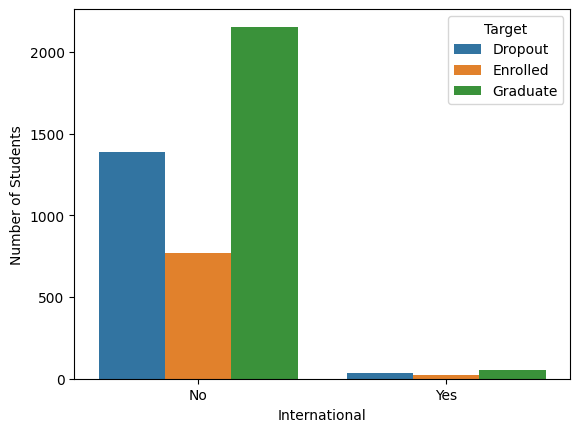

In [223]:
# Melihat Kelas International
sns.countplot(data=df, x='International', hue='Target', hue_order=['Dropout', 'Enrolled', 'Graduate'])
plt.xticks(ticks=[0,1], labels=['No','Yes'])
plt.ylabel('Number of Students')
plt.show()

Dapat dilihat ada lebih banyak mahasiswa yang bukan dari kelas internasional, dan jumlah mahasiswa yang lulus dari kelas biasa (non-internasional) juga lebih tinggi.

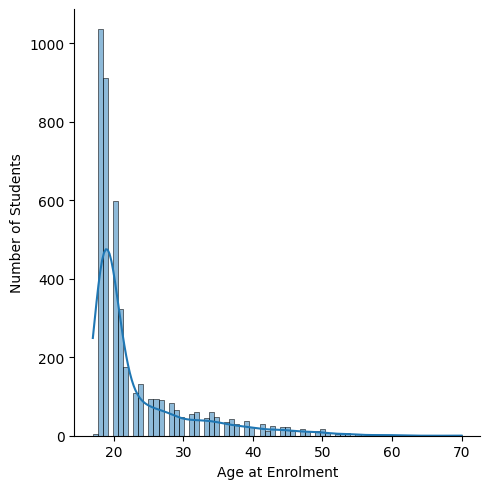

In [224]:
# Melihat Umur Mendaftar
sns.displot(data=df, x='Age at enrollment', kde=True)
plt.xlabel('Age at Enrolment')
plt.ylabel('Number of Students')
plt.show()

Dari data tersebut, terlihat bahwa mahasiswa mendaftar dalam rentang usia yang bervariasi, mulai dari usia 17 hingga 70 tahun, dengan usia rata-rata (yang menjadi mayoritas) sekitar 23 tahun.

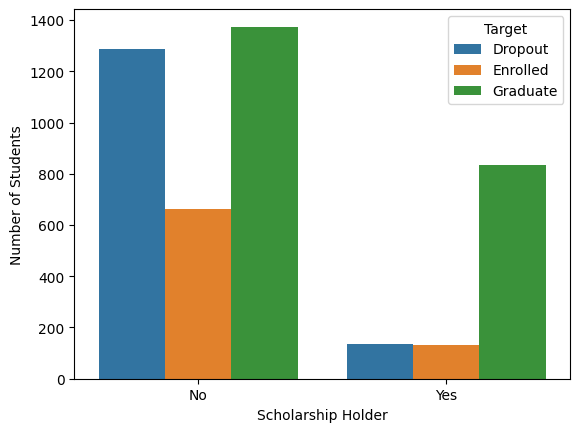

In [225]:
# Melihat Mahasiswa yang Beasiswa
sns.countplot(data=df, x="Scholarship holder", hue='Target', hue_order=['Dropout', 'Enrolled', 'Graduate'])
plt.xticks(ticks=[0,1], labels=['No','Yes'])
plt.xlabel('Scholarship Holder')
plt.ylabel('Number of Students')
plt.show()

Dari grafik di atas, kita dapat menyimpulkan bahwa mahasiswa yang mendapatkan beasiswa memiliki peluang lebih tinggi untuk lulus daripada yang putus sekolah.

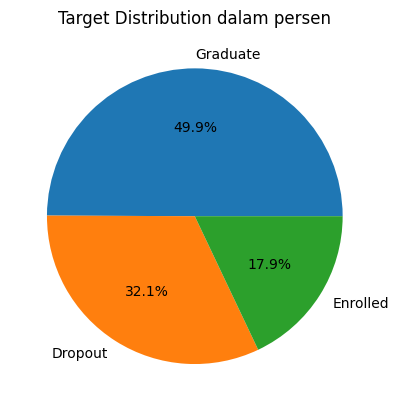

In [226]:
# Menampilkan PieChart
students_target = df['Target'].value_counts()
plt.pie(students_target, labels=students_target.index, autopct='%2.1f%%')
plt.title('Target Distribution dalam persen')
plt.show()

Dapat dilihat bahwa dalam data ini, terdapat tiga kategori utama, yaitu Graduate (lulus), Enrolled (telah mendaftar), dan Dropout (keluar atau tidak lulus). Paling banyak mahasiswa tergolong dalam kategori Graduate, yang menandakan bahwa jumlah mahasiswa yang berhasil menyelesaikan studinya lebih tinggi dibandingkan dengan yang lainnya.

### Feature Selection

In [227]:
# Melihat column beserta isinya
df.nunique()

Marital status                                      6
Application mode                                   18
Application order                                   8
Course                                             17
Daytime/evening attendance                          2
Previous qualification                             17
Nacionality                                        21
Mother's qualification                             29
Father's qualification                             34
Mother's occupation                                32
Father's occupation                                46
Displaced                                           2
Educational special needs                           2
Debtor                                              2
Tuition fees up to date                             2
Gender                                              2
Scholarship holder                                  2
Age at enrollment                                  46
International               

In [228]:
# Uji Korelasi Menggunakan Phik
phik_matrix = phik_matrix(df)

interval columns not set, guessing: ['Marital status', 'Application mode', 'Application order', 'Course', 'Daytime/evening attendance', 'Previous qualification', 'Nacionality', "Mother's qualification", "Father's qualification", "Mother's occupation", "Father's occupation", 'Displaced', 'Educational special needs', 'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder', 'Age at enrollment', 'International', 'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)', 'Curricular units 1st sem (without evaluations)', 'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)', 'Curricular units 2nd sem (without evaluations)', 'Unemployment rate', 'Inflation rate', 'GDP']


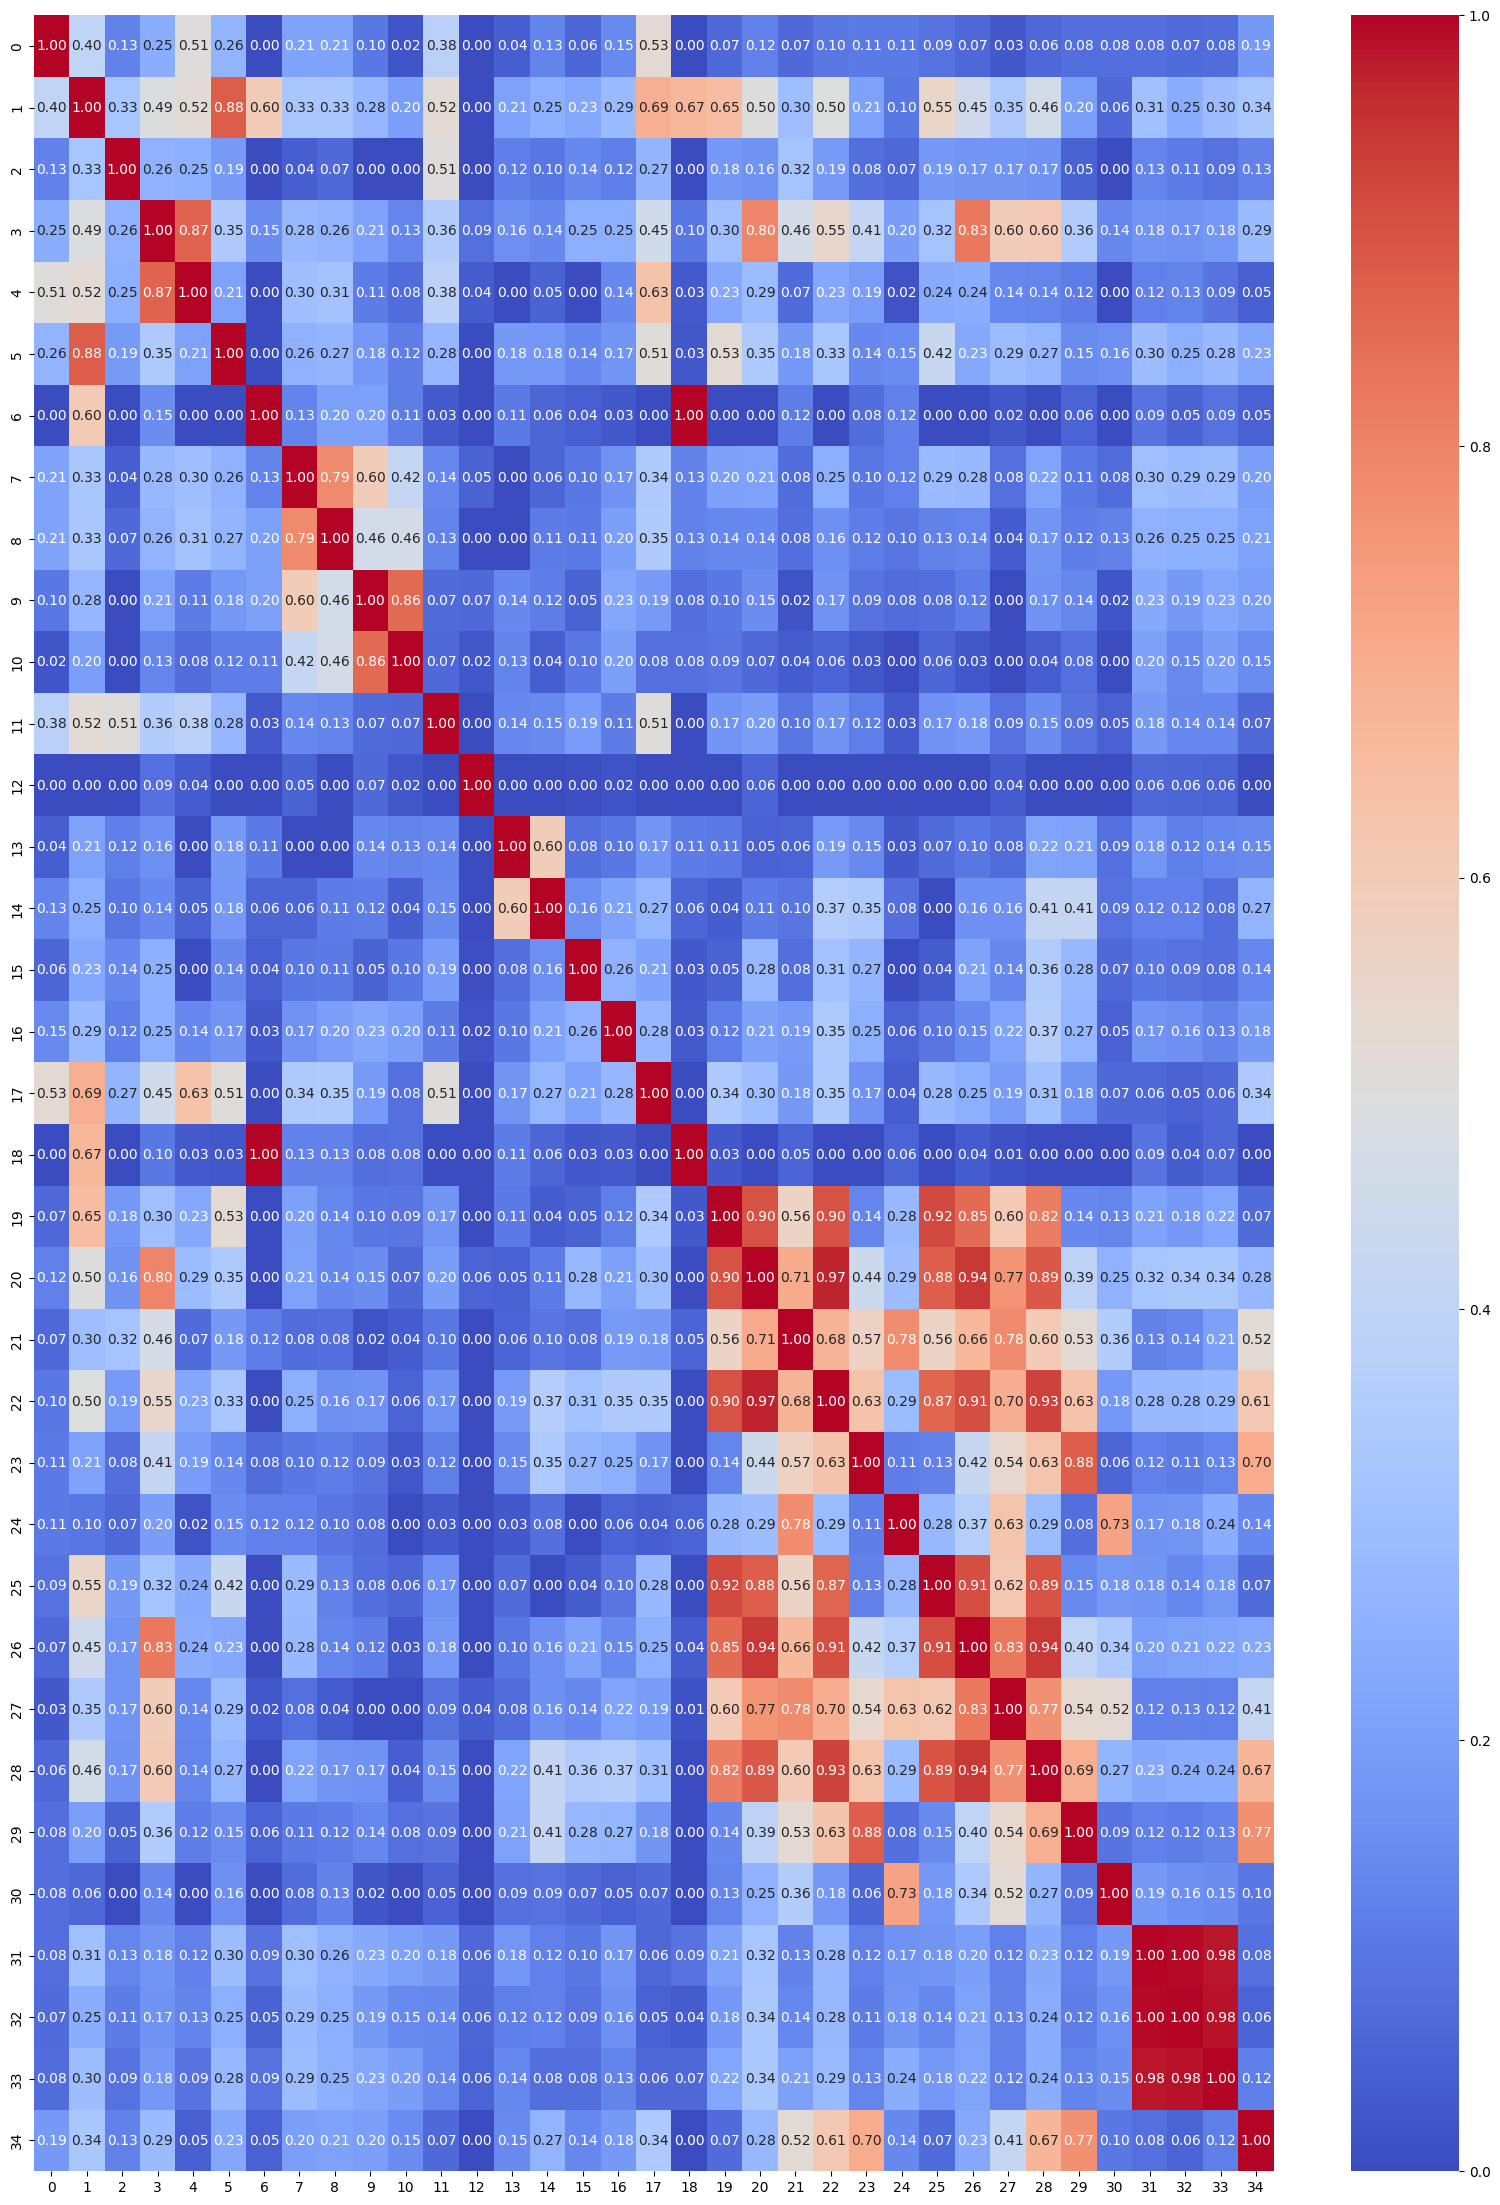

In [229]:
#Membuat plot heatmap phik
plt.figure(figsize=(20, 28))
sns.heatmap(phik_matrix.values, annot=True, fmt=".2f", cmap="coolwarm")
plt.show()

In [230]:
# Kolom target
target_column = 'Target'
# Menampilkan kolom-kolom yang memiliki korelasi tertinggi dengan kolom target
correlations_with_target = phik_matrix.loc[target_column].drop(target_column)
# Urutkan berdasarkan nilai korelasi
sorted_correlations = correlations_with_target.sort_values(ascending=False)
print("Kolom yang memiliki Korelasi Tertinggi dengan", target_column)
print(sorted_correlations)

Kolom yang memiliki Korelasi Tertinggi dengan Target
Curricular units 2nd sem (grade)                  0.773385
Curricular units 1st sem (grade)                  0.700707
Curricular units 2nd sem (approved)               0.674814
Curricular units 1st sem (approved)               0.611147
Curricular units 1st sem (evaluations)            0.522673
Curricular units 2nd sem (evaluations)            0.414982
Age at enrollment                                 0.343226
Application mode                                  0.335835
Course                                            0.286910
Curricular units 1st sem (enrolled)               0.278281
Tuition fees up to date                           0.265261
Curricular units 2nd sem (enrolled)               0.228157
Previous qualification                            0.226012
Father's qualification                            0.207400
Mother's qualification                            0.202395
Mother's occupation                               0.200981
Mar

Dapat dilihat dari data diatas karena saya hanya mengambil 9 teratas saja karena dibawah itu kurang relevan

In [231]:
# Melihat isi dari column Target
df['Target'].value_counts()

Target
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64

Karena masih ada 3 targetnya maka dibuang saja yang Enrolled karena kita hanya mencari yang lulus atau tidak saja

In [232]:
# Membuat df baru dengan column yang digunakan saja
df2 = df[['Curricular units 2nd sem (grade)', 'Curricular units 1st sem (grade)', 'Curricular units 2nd sem (approved)', 'Curricular units 1st sem (approved)','Curricular units 1st sem (evaluations)', 'Curricular units 2nd sem (evaluations)', 'Age at enrollment', 'Application mode', 'Course', 'Target']]
df2

,Curricular units 2nd sem (grade),Curricular units 1st sem (grade),Curricular units 2nd sem (approved),Curricular units 1st sem (approved),Curricular units 1st sem (evaluations),Curricular units 2nd sem (evaluations),Age at enrollment,Application mode,Course,Target
0,0.000000,0.000000,0,0,0,0,20,8,2,Dropout
1,13.666667,14.000000,6,6,6,6,19,6,11,Graduate
2,0.000000,0.000000,0,0,0,0,19,1,5,Dropout
3,12.400000,13.428571,5,6,8,10,20,8,15,Graduate
4,13.000000,12.333333,6,5,9,6,45,12,3,Graduate
...,...,...,...,...,...,...,...,...,...,...
4419,12.666667,13.600000,5,5,7,8,19,1,15,Graduate
4420,11.000000,12.000000,2,6,6,6,18,1,15,Dropout
4421,13.500000,14.912500,1,7,8,9,30,1,12,Dropout
4422,12.000000,13.800000,5,5,5,6,20,1,9,Graduate


In [233]:
# Drop Enrolled dari column Target
df2 = df2[df2.Target!='Enrolled']

Karna kita ingin mengolah yang lulus atau tidak saja maka tidak perlu menggunakan enrolled

In [234]:
# Melihat isi dari column Target
df2['Target'].value_counts()

Target
Graduate    2209
Dropout     1421
Name: count, dtype: int64

Mengubah target dari data menjadi dua kategori utama, yaitu "Graduate" (lulus) dan "Dropout" (tidak lulus), ini dilakukan karena kami ingin melihat prediksi apakah seseorang akan lulus atau tidak. Dan karena beda sedikit jadi tidak usah di SMOTENC atau di balancing

### Encode

In [235]:
# Encode column Target
encoder = LabelEncoder()
df2['Target'] = encoder.fit_transform(df2['Target'])
df2.head()

,Curricular units 2nd sem (grade),Curricular units 1st sem (grade),Curricular units 2nd sem (approved),Curricular units 1st sem (approved),Curricular units 1st sem (evaluations),Curricular units 2nd sem (evaluations),Age at enrollment,Application mode,Course,Target
0,0.000000,0.000000,0,0,0,0,20,8,2,0
1,13.666667,14.000000,6,6,6,6,19,6,11,1
2,0.000000,0.000000,0,0,0,0,19,1,5,0
3,12.400000,13.428571,5,6,8,10,20,8,15,1
4,13.000000,12.333333,6,5,9,6,45,12,3,1


Dapat dilihat bahwa kolom Target sudah berubah menjadi dua nilai, yaitu 0 (tidak lulus) dan 1 (lulus). Hal ini dilakukan untuk menyederhanakan representasi target sehingga kita dapat lebih mudah memprediksi apakah seseorang lulus atau tidak.

### VIF

In [236]:
# Membuat fungsi untuk menghitung Variance Inflation Factor
def calc_vif(X):
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)
# Define kolom yang dibutuhkan
data_VIF = df2
calc_vif(data_VIF)

,variables,VIF
0,Curricular units 2nd sem (grade),24.165671
1,Curricular units 1st sem (grade),22.990979
2,Curricular units 2nd sem (approved),30.639046
3,Curricular units 1st sem (approved),26.602939
4,Curricular units 1st sem (evaluations),13.936038
5,Curricular units 2nd sem (evaluations),14.756427
6,Age at enrollment,8.072615
7,Application mode,3.648687
8,Course,5.349956
9,Target,5.251825


Hasil Data Diatas:

Curricular units 2nd sem (grade) memiliki VIF sekitar 24.17, yang menunjukkan tingkat multicollinearity yang tinggi dengan variabel lain dalam model.

Curricular units 1st sem (grade) memiliki VIF sekitar 22.99, juga menunjukkan tingkat multicollinearity yang tinggi.

Curricular units 2nd sem (approved) memiliki VIF sekitar 30.64, yang menunjukkan tingkat multicollinearity yang sangat tinggi.

Curricular units 1st sem (approved) memiliki VIF sekitar 26.60, juga menunjukkan tingkat multicollinearity yang sangat tinggi.

Variabel lain seperti Curricular units 1st sem (evaluations), Curricular units 2nd sem (evaluations), Age at enrollment, Application mode, Course, dan Target memiliki VIF yang lebih rendah, tetapi tetap menunjukkan tingkat multicollinearity yang signifikan.

## Feature Engineering

In [237]:
# Membagi data fitur dan data target
X= df2.drop('Target', axis=1)
y= df2['Target']

In [238]:
# Membagi data menjadi X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 69,stratify= y)

print('Train Size : ', X_train.shape)
print('Test Size  : ', X_test.shape)
print('Train Size : ', y_train.shape)
print('Test Size  : ', y_test.shape)

Train Size :  (2904, 9)
Test Size  :  (726, 9)
Train Size :  (2904,)
Test Size  :  (726,)


### Handling Outliers

In [239]:
# Melihat Skew dari column numerical (X_train)
print(f"Skewness dari distance :\n{X_train.skew()}")

Skewness dari distance :
Curricular units 2nd sem (grade)         -1.162232
Curricular units 1st sem (grade)         -1.440071
Curricular units 2nd sem (approved)       0.322912
Curricular units 1st sem (approved)       0.772379
Curricular units 1st sem (evaluations)    1.165229
Curricular units 2nd sem (evaluations)    0.453502
Age at enrollment                         2.007469
Application mode                          0.128370
Course                                   -0.218149
dtype: float64


In [240]:
num_pipeline = Pipeline([
        ('outlier', Winsorizer(capping_method='iqr', tail='both', fold=3)),
        ('scaler', MinMaxScaler())
    ])

num_trans = num_pipeline.fit_transform(X_train)
num_trans

array([[0.74122385, 0.69292683, 0.44444444, ..., 0.03846154, 0.        ,
        0.6875    ],
       [0.73221757, 0.6504065 , 0.33333333, ..., 0.03846154, 0.        ,
        0.875     ],
       [0.78103208, 0.63089431, 0.27777778, ..., 0.61538462, 0.64705882,
        1.        ],
       ...,
       [0.65411437, 0.60162602, 0.16666667, ..., 0.11538462, 0.76470588,
        0.25      ],
       [0.65899582, 0.55284553, 0.61111111, ..., 0.11538462, 0.76470588,
        0.5625    ],
       [0.69958159, 0.6466899 , 0.38888889, ..., 0.07692308, 0.        ,
        0.6875    ]])

In [241]:
# Melihat hasil pipeline X_train
X_train_finals = num_pipeline.transform(X_train)
X_train_finals

array([[0.74122385, 0.69292683, 0.44444444, ..., 0.03846154, 0.        ,
        0.6875    ],
       [0.73221757, 0.6504065 , 0.33333333, ..., 0.03846154, 0.        ,
        0.875     ],
       [0.78103208, 0.63089431, 0.27777778, ..., 0.61538462, 0.64705882,
        1.        ],
       ...,
       [0.65411437, 0.60162602, 0.16666667, ..., 0.11538462, 0.76470588,
        0.25      ],
       [0.65899582, 0.55284553, 0.61111111, ..., 0.11538462, 0.76470588,
        0.5625    ],
       [0.69958159, 0.6466899 , 0.38888889, ..., 0.07692308, 0.        ,
        0.6875    ]])

In [242]:
# Melihat hasil pipeline X_test
X_test_finals = num_pipeline.transform(X_test)
X_test_finals

array([[0.53695955, 0.46612466, 0.16666667, ..., 0.34615385, 0.64705882,
        1.        ],
       [0.70292887, 0.52682927, 0.22222222, ..., 0.07692308, 0.        ,
        0.5       ],
       [0.        , 0.        , 0.        , ..., 1.        , 0.64705882,
        0.6875    ],
       ...,
       [0.74895397, 0.67208672, 0.33333333, ..., 0.07692308, 0.        ,
        0.8125    ],
       [0.        , 0.        , 0.        , ..., 0.19230769, 0.        ,
        0.0625    ],
       [0.64435146, 0.72938444, 0.33333333, ..., 0.11538462, 0.        ,
        0.625     ]])

## Model

In [243]:
# Definisi Model
model_svm = SVC()
model_knn = KNeighborsClassifier()
model_rf = RandomForestClassifier()
model_dt = DecisionTreeClassifier()
model_abs = AdaBoostClassifier()

In [244]:
# Pipeline SVM
pipeline_svc = Pipeline([
    ("preprocess", num_pipeline),
    ("classifier", SVC())
])

recall_train_cross_val_svm = cross_val_score(
    pipeline_svc, X_train_finals, y_train, cv=5, scoring="recall")

print('Recall Score - All - Cross Validation  : ', recall_train_cross_val_svm)
print('Recall Score - Mean - Cross Validation : ', recall_train_cross_val_svm.mean())
print('Recall Score - Std - Cross Validation  : ', recall_train_cross_val_svm.std())
print('Recall Score - Range of Test-Set       : ',
      (recall_train_cross_val_svm.mean() - recall_train_cross_val_svm.std()), '-',
      (recall_train_cross_val_svm.mean() + recall_train_cross_val_svm.std()))

Recall Score - All - Cross Validation  :  [0.95762712 0.96327684 0.97167139 0.94334278 0.95750708]
Recall Score - Mean - Cross Validation :  0.9586850402522368
Recall Score - Std - Cross Validation  :  0.009247936739144225
Recall Score - Range of Test-Set       :  0.9494371035130925 - 0.967932976991381


In [245]:
# Pipeline KNN
pipeline_knn = Pipeline([
    ("preprocess", num_pipeline),
    ("classifier", KNeighborsClassifier())
])

recall_train_cross_val_knn = cross_val_score(
    pipeline_knn, X_train_finals, y_train, cv=5, scoring="recall")

print('Recall Score - All - Cross Validation  : ', recall_train_cross_val_knn )
print('Recall Score - Mean - Cross Validation : ', recall_train_cross_val_knn .mean())
print('Recall Score - Std - Cross Validation  : ', recall_train_cross_val_knn .std())
print('Recall Score - Range of Test-Set       : ',
      (recall_train_cross_val_knn .mean() - recall_train_cross_val_knn.std()), '-',
      (recall_train_cross_val_knn .mean() + recall_train_cross_val_knn.std()))

Recall Score - All - Cross Validation  :  [0.94067797 0.93785311 0.93484419 0.92351275 0.90084986]
Recall Score - Mean - Cross Validation :  0.9275475744626366
Recall Score - Std - Cross Validation  :  0.014566397634100194
Recall Score - Range of Test-Set       :  0.9129811768285364 - 0.9421139720967368


In [246]:
# Pipeline RandomForest
pipeline_rf = Pipeline([
    ("preprocess", num_pipeline),
    ("classifier", RandomForestClassifier())
])

recall_train_cross_val_rf = cross_val_score(
    pipeline_rf, X_train_finals, y_train, cv=5, scoring="recall")

print('Recall Score - All - Cross Validation  : ', recall_train_cross_val_rf)
print('Recall Score - Mean - Cross Validation : ', recall_train_cross_val_rf.mean())
print('Recall Score - Std - Cross Validation  : ', recall_train_cross_val_rf.std())
print('Recall Score - Range of Test-Set       : ',
      (recall_train_cross_val_rf.mean() - recall_train_cross_val_rf.std()), '-',
      (recall_train_cross_val_rf.mean() + recall_train_cross_val_rf.std()))

Recall Score - All - Cross Validation  :  [0.94915254 0.94915254 0.93201133 0.94334278 0.92917847]
Recall Score - Mean - Cross Validation :  0.940567532529889
Recall Score - Std - Cross Validation  :  0.008461986551283343
Recall Score - Range of Test-Set       :  0.9321055459786056 - 0.9490295190811724


In [247]:
# Pipeline DecisionTree
pipeline_dt = Pipeline([
    ("preprocess", num_pipeline),
    ("classifier", DecisionTreeClassifier())
])
recall_train_cross_val_dt = cross_val_score(
    pipeline_dt, X_train_finals, y_train, cv=5, scoring="recall")

print('Recall Score - All - Cross Validation  : ', recall_train_cross_val_dt)
print('Recall Score - Mean - Cross Validation : ', recall_train_cross_val_dt.mean())
print('Recall Score - Std - Cross Validation  : ', recall_train_cross_val_dt.std())
print('Recall Score - Range of Test-Set       : ',
      (recall_train_cross_val_dt.mean() - recall_train_cross_val_dt.std()), '-',
      (recall_train_cross_val_dt.mean() + recall_train_cross_val_dt.std()))

Recall Score - All - Cross Validation  :  [0.87288136 0.8559322  0.84135977 0.85552408 0.83852691]
Recall Score - Mean - Cross Validation :  0.8528448648389111
Recall Score - Std - Cross Validation  :  0.012288872358562753
Recall Score - Range of Test-Set       :  0.8405559924803483 - 0.8651337371974739


In [248]:
# Pipeline AdaBoost
pipeline_abs = Pipeline([
    ("preprocess", num_pipeline),
    ("classifier", AdaBoostClassifier())
])

recall_train_cross_val_ab = cross_val_score(
    pipeline_abs, X_train_finals, y_train, cv=5, scoring="recall")

print('Recall Score - All - Cross Validation  : ', recall_train_cross_val_ab)
print('Recall Score - Mean - Cross Validation : ', recall_train_cross_val_ab.mean())
print('Recall Score - Std - Cross Validation  : ', recall_train_cross_val_ab.std())
print('Recall Score - Range of Test-Set       : ',
      (recall_train_cross_val_ab.mean() - recall_train_cross_val_ab.std()), '-',
      (recall_train_cross_val_ab.mean() + recall_train_cross_val_ab.std()))

Recall Score - All - Cross Validation  :  [0.94067797 0.90112994 0.92917847 0.91784703 0.91501416]
Recall Score - Mean - Cross Validation :  0.9207695139322354
Recall Score - Std - Cross Validation  :  0.01337486245802226
Recall Score - Range of Test-Set       :  0.9073946514742132 - 0.9341443763902576


In [249]:
# Melakukan Fit pada SVM
model_svm.fit(X_train_finals, y_train)

svm_train = model_svm.predict(X_train_finals)
svm_test = model_svm.predict(X_test_finals)

print(classification_report(y_train, svm_train))
print(classification_report(y_test, svm_test))

              precision    recall  f1-score   support

           0       0.94      0.76      0.84      1137
           1       0.86      0.97      0.91      1767

    accuracy                           0.88      2904
   macro avg       0.90      0.86      0.87      2904
weighted avg       0.89      0.88      0.88      2904

              precision    recall  f1-score   support

           0       0.92      0.74      0.82       284
           1       0.85      0.96      0.90       442

    accuracy                           0.87       726
   macro avg       0.89      0.85      0.86       726
weighted avg       0.88      0.87      0.87       726



In [250]:
# Melakukan Fit pada KNN
model_knn.fit(X_train_finals, y_train)

knn_train = model_knn.predict(X_train_finals)
knn_test = model_knn.predict(X_test_finals)

print(classification_report(y_train, knn_train))
print(classification_report(y_test, knn_test))

              precision    recall  f1-score   support

           0       0.91      0.81      0.86      1137
           1       0.89      0.95      0.92      1767

    accuracy                           0.90      2904
   macro avg       0.90      0.88      0.89      2904
weighted avg       0.90      0.90      0.89      2904

              precision    recall  f1-score   support

           0       0.84      0.76      0.80       284
           1       0.86      0.91      0.88       442

    accuracy                           0.85       726
   macro avg       0.85      0.84      0.84       726
weighted avg       0.85      0.85      0.85       726



In [251]:
# Melakukan FIT pada RandomForest
model_rf.fit(X_train_finals, y_train)

rf_train = model_rf.predict(X_train_finals)
rf_test = model_rf.predict(X_test_finals)

print(classification_report(y_train, rf_train))
print(classification_report(y_test, rf_test))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1137
           1       0.98      0.99      0.99      1767

    accuracy                           0.99      2904
   macro avg       0.99      0.99      0.99      2904
weighted avg       0.99      0.99      0.99      2904

              precision    recall  f1-score   support

           0       0.89      0.77      0.83       284
           1       0.86      0.94      0.90       442

    accuracy                           0.87       726
   macro avg       0.88      0.86      0.86       726
weighted avg       0.87      0.87      0.87       726



In [252]:
# Melakukan Fit pada Decision Tree
model_dt.fit(X_train_finals, y_train)

dt_train = model_dt.predict(X_train_finals)
dt_test = model_dt.predict(X_test_finals)

print(classification_report(y_train, dt_train))
print(classification_report(y_test, dt_test))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1137
           1       0.99      0.99      0.99      1767

    accuracy                           0.99      2904
   macro avg       0.99      0.99      0.99      2904
weighted avg       0.99      0.99      0.99      2904

              precision    recall  f1-score   support

           0       0.77      0.76      0.77       284
           1       0.85      0.86      0.85       442

    accuracy                           0.82       726
   macro avg       0.81      0.81      0.81       726
weighted avg       0.82      0.82      0.82       726



In [253]:
# Melakukan Fit pada AdaBoost
model_abs.fit(X_train_finals, y_train)

abs_train = model_abs.predict(X_train_finals)
abs_test = model_abs.predict(X_test_finals)

print(classification_report(y_train, abs_train))
print(classification_report(y_test, abs_test))

              precision    recall  f1-score   support

           0       0.88      0.83      0.85      1137
           1       0.89      0.92      0.91      1767

    accuracy                           0.89      2904
   macro avg       0.89      0.88      0.88      2904
weighted avg       0.89      0.89      0.89      2904

              precision    recall  f1-score   support

           0       0.85      0.83      0.84       284
           1       0.89      0.90      0.90       442

    accuracy                           0.87       726
   macro avg       0.87      0.87      0.87       726
weighted avg       0.87      0.87      0.87       726



Dari hasil di atas, dapat disimpulkan bahwa model KNN, RandomForest, Decision Tree, dan SVM cenderung mengalami overfitting atau memiliki kinerja yang kurang memuaskan. Hal ini terlihat dari hasil prediksinya yang mungkin terlalu sesuai dengan data pelatihan, namun tidak generalisasi dengan baik pada data uji. Sebaliknya, model AdaBoost memberikan hasil yang lebih baik (Precision Test: 0.89, dan Precision Train: 0.89). Ini terjadi karena penggunaan matrix precision yang menekankan pada kemampuan model dalam mengidentifikasi mahasiswa yang sebenarnya tidak lulus tetapi diprediksi lulus. Dengan kata lain, model AdaBoost cenderung lebih baik dalam mengurangi kesalahan prediksi di mana mahasiswa yang seharusnya tidak lulus tetapi diprediksi lulus.

## Hyperparameter Tuning

In [254]:
# Membuat hyperparameter
grid_search_params = {
    'classifier__n_estimators': [1, 100, 150, 200],
    'classifier__algorithm': ['SAMME', 'SAMME.R'],
    'classifier__random_state': [69]}


abs_gridcv = GridSearchCV(estimator=pipeline_abs,
                         param_grid=grid_search_params,
                         cv=5,
                         n_jobs=-1,
                         scoring='precision')

abs_gridcv.fit(X_train_finals, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocess',
                                        Pipeline(steps=[('outlier',
                                                         Winsorizer(capping_method='iqr',
                                                                    tail='both')),
                                                        ('scaler',
                                                         MinMaxScaler())])),
                                       ('classifier', AdaBoostClassifier())]),
             n_jobs=-1,
             param_grid={'classifier__algorithm': ['SAMME', 'SAMME.R'],
                         'classifier__n_estimators': [1, 100, 150, 200],
                         'classifier__random_state': [69]},
             scoring='precision')

In [255]:
# Melihat hasil dari best parameters
mean_grid = abs_gridcv.cv_results_['mean_test_score'].mean()
std_grid = abs_gridcv.cv_results_['mean_test_score'].std()
abs_gridcv_best = abs_gridcv.best_params_

print(f'mean grid: {mean_grid}')
print(f'Stdev grid: {std_grid}')
print(f'Best Paramater grid: {abs_gridcv_best}')

mean grid: 0.8742063812788755
Stdev grid: 0.014760549060948317
Best Paramater grid: {'classifier__algorithm': 'SAMME.R', 'classifier__n_estimators': 150, 'classifier__random_state': 69}


In [256]:
model_abs_best = abs_gridcv.best_estimator_

In [257]:
y_test_default = model_abs.predict(X_test_finals)
y_test_best = model_abs_best.predict(X_test_finals)

#### Hasil Default

Precision Score - Test Set   :  0.89086859688196 

Classification Report        : 
               precision    recall  f1-score   support

           0       0.85      0.83      0.84       284
           1       0.89      0.90      0.90       442

    accuracy                           0.87       726
   macro avg       0.87      0.87      0.87       726
weighted avg       0.87      0.87      0.87       726
 

Confusion Matrix             : 


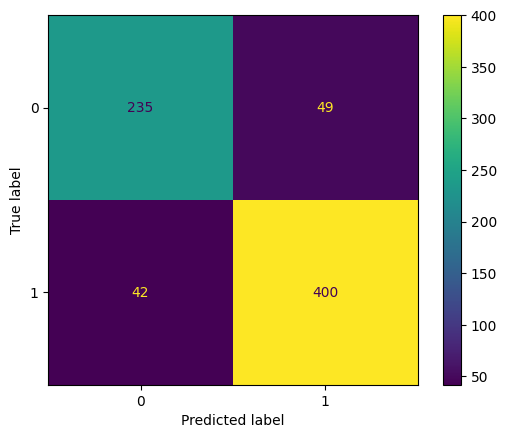

In [258]:
print('Precision Score - Test Set   : ', precision_score(y_test, y_test_default), '\n')
print('Classification Report        : \n', classification_report(y_test, y_test_default), '\n')
print('Confusion Matrix             : \n', ConfusionMatrixDisplay.from_estimator(model_abs, X_test_finals, y_test))

#### Hasil Hypertuning

Precision Score - Test Set   :  0.9011235955056179 

Classification Report        : 
               precision    recall  f1-score   support

           0       0.85      0.85      0.85       284
           1       0.90      0.91      0.90       442

    accuracy                           0.88       726
   macro avg       0.88      0.88      0.88       726
weighted avg       0.88      0.88      0.88       726
 

Confusion Matrix             : 


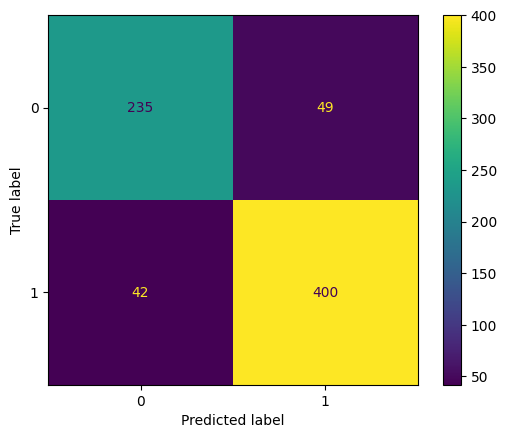

In [259]:
print('Precision Score - Test Set   : ', precision_score(y_test, y_test_best), '\n')
print('Classification Report        : \n', classification_report(y_test, y_test_best), '\n')
print('Confusion Matrix             : \n', ConfusionMatrixDisplay.from_estimator(model_abs, X_test_finals, y_test))

Dapat dilihat bahwa dalam dataset, terdapat 49 data yang seharusnya tidak lulus tetapi diprediksi lulus oleh model, sementara ada 42 data yang seharusnya lulus tetapi diprediksi tidak lulus. Oleh karena itu, ketepatan hasil dari model yang telah kita buat terlihat sangat baik, mengingat adanya perbedaan yang relatif kecil antara prediksi dan kenyataannya.

In [260]:
# Membuat table baru default untuk membandingkan dengan nilai precision score yang default dan yang sudah dengan menggunakan AdaBoost
all_reports = {}
def performance_report(all_reports, y_test, y_test_default, name):
  score_reports = {
      'test - precision' : precision_score(y_test, y_test_default),
      'test - recall' : recall_score(y_test, y_test_default),
      'test - accuracy_score' : accuracy_score(y_test, y_test_default),
      'test - f1_score' : f1_score(y_test, y_test_default),
  }
  all_reports[name] = score_reports
  return all_reports

all_reports = performance_report(all_reports, y_test, y_test_default, 'Baseline (Default Hyperparameter)')
all_reports = performance_report(all_reports, y_test, y_test_best, 'Best Parameter')
pd.DataFrame(all_reports)

,Baseline (Default Hyperparameter),Best Parameter
test - precision,0.890869,0.901124
test - recall,0.904977,0.907240
test - accuracy_score,0.874656,0.882920
test - f1_score,0.897868,0.904171


Dapat dilihat bahwa precision setelah menggunakan Best Hyperparameter hasilnya lebih bagus (0.90) dibandingkan Default Hyperparameter (0.89). Sehingga, saya lebih memilih untuk menggunakan Best Hyperparameter untuk dimasukan ke Pipeline.

## Model Saving

In [261]:
# Melihat PipeLine
num_pipeline

Pipeline(steps=[('outlier', Winsorizer(capping_method='iqr', tail='both')),
                ('scaler', MinMaxScaler())])

In [262]:
abs_model = AdaBoostClassifier(algorithm  = 'SAMME.R', n_estimators  = 150, random_state  = 69)
abs_model.fit(X_train_finals, y_train)

AdaBoostClassifier(n_estimators=150, random_state=69)

In [263]:
# Menggabungkan semua pipeline
all_process = Pipeline([
    ("preprocess", num_pipeline),
    ("classification", abs_model)
])
all_process

Pipeline(steps=[('preprocess',
                 Pipeline(steps=[('outlier',
                                  Winsorizer(capping_method='iqr',
                                             tail='both')),
                                 ('scaler', MinMaxScaler())])),
                ('classification',
                 AdaBoostClassifier(n_estimators=150, random_state=69))])

In [264]:
# Model Saving
with open('all_process.pkl', 'wb') as file_1:
  pickle.dump(all_process, file_1)

## Kesimpulan

<style>
  .first-word-indent {
    text-indent: 2em;
  }
</style>

<p class="first-word-indent">Kesimpulannya , dapat dilihat bahwa, berdasarkan hasil evaluasi dan pengujian yang telah dilakukan, model AdaBoost dengan penggunaan Best Hyperparameter adalah pilihan yang sangat optimal. Model ini lebih baik dibandingkan dengan model yang lain dalam hal memprediksi mahasiswa yang sebenarnya tidak lulus, tetapi telah diprediksi sebagai lulus oleh model tersebut. Oleh karena itu, dalam rangka meningkatkan precision dan efisiensi model, rekomendasi saya yaitu menggunakan model AdaBoost dengan konfigurasi Best Hyperparameter.</p>

<p class="first-word-indent">Penerapan model ini memiliki potensi untuk mengurangi kesalahan sistem yang digunakan oleh Universitas, terutama dalam kasus di mana model sebelumnya sering salah dalam memberikan hasil, seperti mahasiswa yang sebenarnya tidak lulus tetapi diprediksi lulus. Dengan demikian, langkah ini dapat dianggap sebagai langkah positif dalam menurunkan tingkat kesalahan dalam sistem, yang pada akhirnya dapat meningkatkan kualitas pengambilan keputusan.</p>

**Kelebihan** dan **Kekurangan** Model:<br>
**Kelebihan**:
1.  Kinerja yang Optimal: Model AdaBoost dengan penggunaan Best Hyperparameter telah terbukti memberikan kinerja yang sangat optimal dalam memprediksi mahasiswa yang sebenarnya tidak lulus, tetapi diprediksi lulus. Ini dapat membantu dalam meningkatkan akurasi prediksi.
   
2. Mengurangi Kesalahan Sistem: Penggunaan model ini memiliki potensi untuk mengurangi kesalahan sistem yang sering terjadi, seperti mahasiswa yang sebenarnya tidak lulus tetapi diprediksi lulus. Hal ini meningkatkan kualitas pengambilan keputusan oleh Universitas.
  
3. Rekomendasi Berdasarkan Hasil Evaluasi: Kesimpulan yang diambil didasarkan pada hasil evaluasi dan pengujian yang baik, yang memberikan model yang kuat untuk rekomendasi menggunakan model AdaBoost dengan konfigurasi Best Hyperparameter.
  
**Kekurangan**:
1. **Tergantung pada Kualitas Data:**
Keberhasilan model ini sangat bergantung pada kualitas data yang digunakan dalam pelatihan. Jika data pelatihan tidak kurang bagus atau bermasalah, kinerja model bisa terpengaruh.

2. **Kompleksitas Model:**
AdaBoost adalah algoritma model yang bisa menjadi kompleks, terutama dengan penggunaan hyperparameter yang optimal. Ini bisa membuat pemahaman model dan proses debugging menjadi lebih sulit.

3. **Perlu Tuning Hyperparameter:**
Meskipun disebutkan penggunaan Best Hyperparameter, tuning hyperparameter pada model ini bisa memerlukan waktu dan upaya tambahan, dan tidak selalu mudah dilakukan.

4. **Keterbatasan dalam Kasus-kasus Khusus:**
Meskipun optimal dalam banyak kasus, AdaBoost mungkin tidak selalu menjadi pilihan terbaik untuk semua jenis masalah. Terdapat kasus-kasus khusus di mana model lain mungkin lebih sesuai.

5. **Kinerja yang Sensitif terhadap Outlier:**
AdaBoost lebih cenderung sensitif terhadap outlier dalam data, yang dapat memengaruhi proses kerjanya.